In [1]:
#importing necessary packages

from tensorflow.keras.utils import array_to_img, img_to_array, load_img

from sklearn.utils import class_weight , compute_class_weight


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import tensorflow as tf
from keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Activation
from keras.optimizers import Adam , SGD, RMSprop
from keras.utils import array_to_img, img_to_array, load_img
from keras.regularizers import l1 , l2 
from keras.wrappers import scikit_learn
from keras.callbacks import EarlyStopping
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # This prevents kernel shut down due to xgboost conflict
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # This line prevents tf's comments about the optimizing your machine

# Directory path
train_dir = 'chest_xray/train/'
test_dir = 'chest_xray/test/'
val_dir = 'chest_xray/val/'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)



# Get all the data in the directory chest_xray/train (5216 images) and reshape them
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (200, 200),
        batch_size=5216, class_mode='binary')

# Get all the data in the directory chest_xray/test (624 images) , and reshape them
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size = (200, 200),
        batch_size=624, class_mode='binary')


# Get all the data in the directory chest_xray/val (16 images), and reshape them
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size = (200, 200),
        batch_size=16, class_mode='binary')


In [ ]:
# may try data augmentation if needed 

# Data Augmentation will be performed only on the training set
# All image sets will be rescaled by 1./255
#train_datagen = ImageDataGenerator(rescale=1./255, 
#                                   rotation_range=20, 
#                                   width_shift_range=0.2, 
#                                   height_shift_range=0.2, 
#                                   shear_range=0.2, 
#                                   zoom_range=0.2, 
#                                   horizontal_flip=True)
#val_datagen = ImageDataGenerator(rescale=1./255)
#test_datagen = ImageDataGenerator(rescale=1./255)



# Directory path
train_dir = 'chest_xray/train/'
test_dir = 'chest_xray/test/'
val_dir = 'chest_xray/val/'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)



# Get all the data in the directory chest_xray/train (5216 images) and reshape them
train_generator = train_datagen.flow_from_directory(
        train_dir,
        batch_size=5216, class_mode='binary')

# Get all the data in the directory chest_xray/test (624 images) , and reshape them
test_generator = test_datagen.flow_from_directory(
        test_dir,
        batch_size=624, class_mode='binary')


# Get all the data in the directory chest_xray/val (16 images), and reshape them
val_generator = val_datagen.flow_from_directory(
        val_dir,
        batch_size=16, class_mode='binary')

# Directory path
train_dir = 'chest_xray/train/'
test_dir = 'chest_xray/test/'
val_dir = 'chest_xray/val/'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True


# Get all the data in the directory chest_xray/train (5216 images) and reshape them
train_generator = train_datagen.flow_from_directory(
        train_dir,
        batch_size=5216,
        target_size=(100, 100), 
        class_mode='binary')

# Get all the data in the directory chest_xray/test (624 images) , and reshape them
test_generator = test_datagen.flow_from_directory(
        test_dir,
        batch_size=624,
        target_size=(100, 100),
        class_mode='binary')


# Get all the data in the directory chest_xray/val (16 images), and reshape them
val_generator = val_datagen.flow_from_directory(
        val_dir,
        batch_size=16,
        target_size=(100, 100), 
        class_mode='binary')

In [ ]:
# Directory path
train_dir = 'chest_xray/train/'
test_dir = 'chest_xray/test/'
val_dir = 'chest_xray/val/'

In [23]:
# Directory path
train_dir = 'chest_xray/train/'
test_dir = 'chest_xray/test/'
val_dir = 'chest_xray/val/'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


# Get all the data in the directory chest_xray/train (5216 images) and reshape them
train_generator = train_datagen.flow_from_directory(
        train_dir,
        batch_size=5216,
        target_size=(100, 100), 
        class_mode='binary')

# Get all the data in the directory chest_xray/test (624 images) , and reshape them
test_generator = test_datagen.flow_from_directory(
        test_dir,
        batch_size=624,
        target_size=(100, 100),
        class_mode='binary')


# Get all the data in the directory chest_xray/val (16 images), and reshape them
val_generator = val_datagen.flow_from_directory(
        val_dir,
        batch_size=16,
        target_size=(100, 100), 
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [24]:
# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [25]:
# Previewing shape of each dataset

print("Image Dataset Shape")
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

print("Label Dataset Shape")
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)



Image Dataset Shape
(5216, 100, 100, 3)
(624, 100, 100, 3)
(16, 100, 100, 3)
Label Dataset Shape
(5216,)
(624,)
(16,)


In [26]:
example_img = train_images[10]

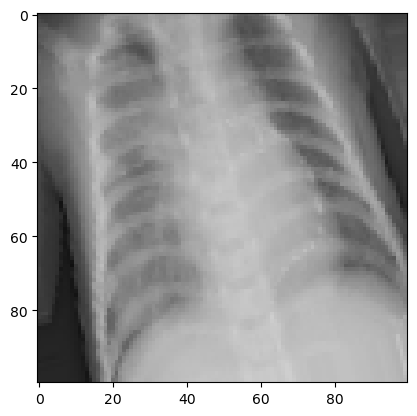

In [27]:
plt.imshow(example_img)

In [28]:
# Reshaping image datasets
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 30000)
(624, 30000)
(16, 30000)


In [29]:
train_img[:10]

array([[0.34948418, 0.34948418, 0.34948418, ..., 0.02352941, 0.02352941,
        0.02352941],
       [0.1528227 , 0.1528227 , 0.1528227 , ..., 0.00177291, 0.00177291,
        0.00177291],
       [0.1419635 , 0.1419635 , 0.1419635 , ..., 0.47154975, 0.47154975,
        0.47154975],
       ...,
       [0.19161478, 0.19161478, 0.19161478, ..., 0.        , 0.        ,
        0.        ],
       [0.29122114, 0.29122114, 0.29122114, ..., 0.08235294, 0.08235294,
        0.08235294],
       [0.        , 0.        , 0.        , ..., 0.03137255, 0.03137255,
        0.03137255]], dtype=float32)

In [30]:
# Reshaping labels
train_y = np.reshape(train_labels, (5216,1))
test_y = np.reshape(test_labels, (624,1))
val_y = np.reshape(val_labels, (16,1))

print(train_y.shape)
print(test_y.shape)
print(val_y.shape)

(5216, 1)
(624, 1)
(16, 1)


In [31]:
# Viewing first 10 labels
train_y[:10]

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [32]:
# Viewing class indices
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

## Baseline CNN Model 

In [ ]:
# cnn baseline model

cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(filters= 8, 
                        kernel_size=(3,3), 
                        activation='relu', 
                        input_shape=(100, 100, 3)))
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(layers.Conv2D(16, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(16, (3, 3), activation='relu'))

# Adding dense layers on top

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(16, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

# Compiling model with following parameters
cnn_model.compile(optimizer='adam',
                loss='binary_crossentropy', 
                metrics=['accuracy'])

# Inspecting model summary
cnn_model.summary()

# Fit and train the model 
cnn_model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Evaluate the model 
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print(test_acc)


Baseline CNN model (before data augmentation):
- Train Accuracy: 0.98
- Test Accuracy: 0.78

Model shows signs of overfitting. 

In [33]:
# cnn baseline model

cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(filters= 8, 
                        kernel_size=(3,3), 
                        activation='relu', 
                        input_shape=(100, 100, 3)))
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(layers.Conv2D(16, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(16, (3, 3), activation='relu'))

In [34]:
# Inspecting model summary

cnn_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 8)         224       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
Total params: 3,712
Trainable params: 3,712
Non-traina

In [35]:
# Adding dense layers on top

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(16, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

In [36]:
# Inspecting model summary

cnn_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 8)         224       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 flatten_2 (Flatten)         (None, 7056)             

In [37]:
# Compiling model with following parameters
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

In [38]:
# Fit and train the model 
cnn_model.fit(train_images, train_labels, epochs=10, batch_size= 128)

Epoch 1/10
41/41 [==============================] - 20s 451ms/step - loss: 0.5426 - accuracy: 0.7318
Epoch 2/10
41/41 [==============================] - 15s 368ms/step - loss: 0.4148 - accuracy: 0.7483
Epoch 3/10
41/41 [==============================] - 16s 381ms/step - loss: 0.3765 - accuracy: 0.8353
Epoch 4/10
41/41 [==============================] - 17s 406ms/step - loss: 0.3632 - accuracy: 0.8405
Epoch 5/10
41/41 [==============================] - 17s 404ms/step - loss: 0.3322 - accuracy: 0.8645
Epoch 6/10
41/41 [==============================] - 16s 393ms/step - loss: 0.3343 - accuracy: 0.8643
Epoch 7/10
41/41 [==============================] - 18s 437ms/step - loss: 0.3232 - accuracy: 0.8702
Epoch 8/10
41/41 [==============================] - 16s 394ms/step - loss: 0.3137 - accuracy: 0.8763
Epoch 9/10
41/41 [==============================] - 16s 379ms/step - loss: 0.3039 - accuracy: 0.8809
Epoch 10/10
41/41 [==============================] - 16s 392ms/step - loss: 0.3192 - accura

In [39]:
# Evaluate the model 
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print(test_acc)

20/20 [==============================] - 1s 42ms/step - loss: 0.4935 - accuracy: 0.7740
0.7740384340286255


In [40]:
train_loss, train_acc = cnn_model.evaluate(train_images, train_labels)
print(train_acc)

163/163 [==============================] - 6s 37ms/step - loss: 0.3845 - accuracy: 0.8409
0.8408742547035217


CNN model (after data augmentation):
- Train Accuracy: 0.84
- Test Accuracy: 0.77

Model's overfitting is improving. Will continue to adjust to work to improve perfromance. 

## CNN Model 3

In [41]:
# cnn model #2
# increases number of filters to add complexity, only increased the conv2d layers

cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(filters= 16, 
                        kernel_size=(3,3), 
                        activation='relu', 
                        input_shape=(100, 100, 3)))
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Adding dense layers on top

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(16, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

# Compiling model with following parameters
cnn_model.compile(optimizer='adam',
                loss='binary_crossentropy', 
                metrics=['accuracy'])

# Inspecting model summary
cnn_model.summary()

# Fit and train the model 
cnn_model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Evaluate the model 
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print(test_acc)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 21, 21, 32)        9248      
                                                                 
 flatten_3 (Flatten)         (None, 14112)            

In [42]:
train_loss, train_acc = cnn_model.evaluate(train_images, train_labels)
print(train_acc)

163/163 [==============================] - 8s 49ms/step - loss: 0.1852 - accuracy: 0.9258
0.9258052110671997


In [43]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print(test_acc)

20/20 [==============================] - 1s 48ms/step - loss: 0.3363 - accuracy: 0.8766
0.8766025900840759


CNN model (after data augmentation and conv2d filter count doubled from previous model ):

- Train Accuracy: 0.9258
- Test Accuracy: 0.8766
- 
Model's overfitting is improving. Will continue to adjust to work to improve performance.

Epoch 1/10
41/41 [==============================] - 38s 910ms/step - loss: 0.1850 - accuracy: 0.9264 - val_loss: 1.2482 - val_accuracy: 0.5625
Epoch 2/10
41/41 [==============================] - 25s 606ms/step - loss: 0.1663 - accuracy: 0.9319 - val_loss: 0.6894 - val_accuracy: 0.6875
Epoch 3/10
41/41 [==============================] - 24s 595ms/step - loss: 0.1712 - accuracy: 0.9335 - val_loss: 1.5360 - val_accuracy: 0.6250
Epoch 4/10
41/41 [==============================] - 25s 604ms/step - loss: 0.1774 - accuracy: 0.9291 - val_loss: 0.7537 - val_accuracy: 0.6875
Epoch 5/10
41/41 [==============================] - 26s 625ms/step - loss: 0.1596 - accuracy: 0.9360 - val_loss: 1.9074 - val_accuracy: 0.5625
Epoch 6/10
41/41 [==============================] - 77s 2s/step - loss: 0.1828 - accuracy: 0.9283 - val_loss: 0.8858 - val_accuracy: 0.6875
Epoch 7/10
41/41 [==============================] - 59s 1s/step - loss: 0.1401 - accuracy: 0.9434 - val_loss: 0.6431 - val_accuracy: 0.6875
Epoch

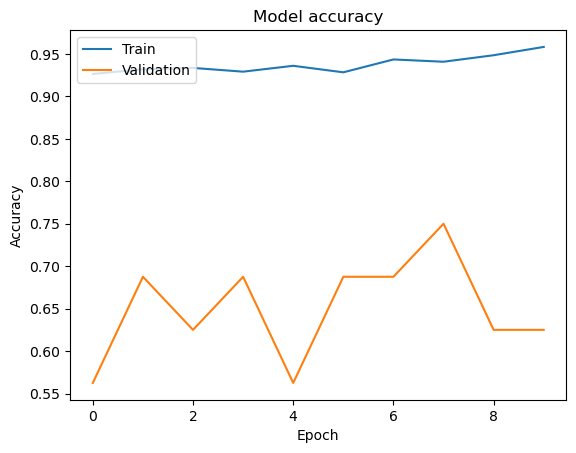

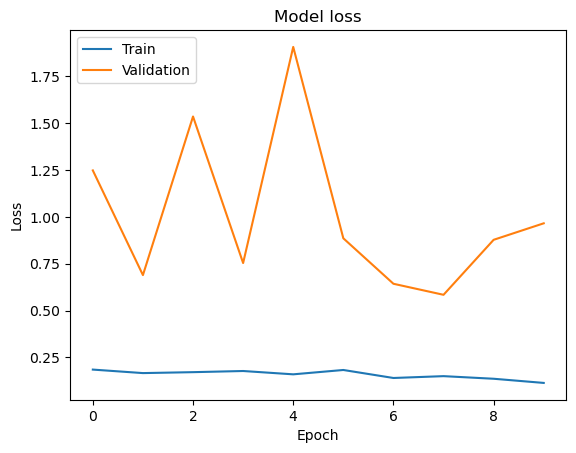

20/20 [==============================] - 1s 60ms/step - loss: 0.4731 - accuracy: 0.8478
Test Accuracy: 0.8477563858032227


In [44]:
import matplotlib.pyplot as plt
import keras

# Define a function to plot training and validation curves
def plot_curves(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


# Train the model and store the history
history = cnn_model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(val_images, val_labels))

# Plot the curves
plot_curves(history)

# Evaluate on the test set
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)


## CNN Model 4

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 batch_normalization_6 (Batc  (None, 98, 98, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 47, 47, 32)        4640      
                                                                 
 batch_normalization_7 (Batc  (None, 47, 47, 32)       128       
 hNormalization)                                                 
                                                      

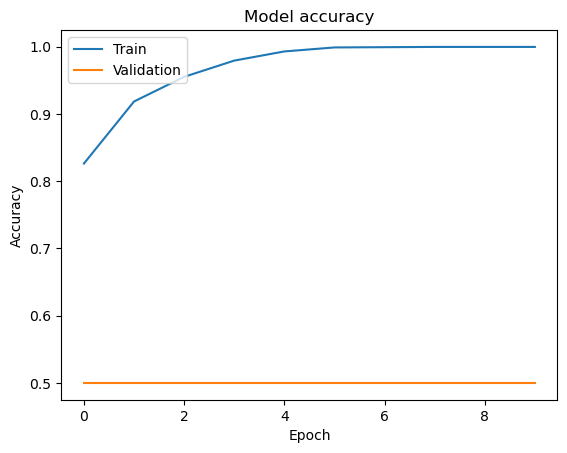

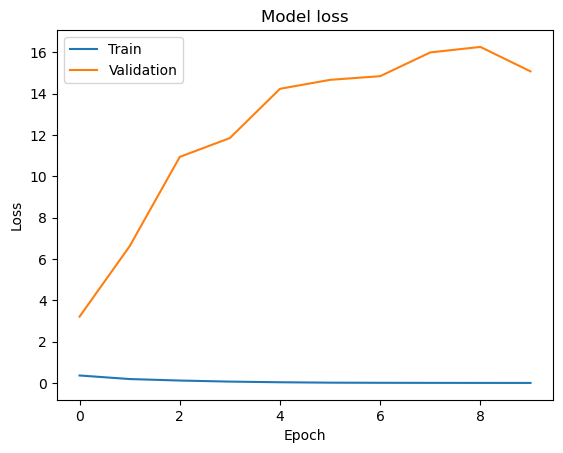

In [46]:
# cnn model 4 
# data augmentation
# increases number of filters to add complexity, only increased the conv2d layers
# adding batch normalization

cnn_model2 = models.Sequential()
cnn_model2.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(100, 100, 3)))
cnn_model2.add(layers.BatchNormalization())
cnn_model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model2.add(layers.BatchNormalization())
cnn_model2.add(layers.MaxPooling2D((2, 2)))
cnn_model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model2.add(layers.BatchNormalization())


# Adding dense layers on top

cnn_model2.add(layers.Flatten())
cnn_model2.add(layers.Dense(16, activation='relu'))
cnn_model2.add(layers.Dense(1, activation='sigmoid'))

# Compiling model with following parameters
cnn_model2.compile(optimizer='adam',
                loss='binary_crossentropy', 
                metrics=['accuracy'])

# Inspecting model summary
cnn_model2.summary()

# Train the model and store the history
history = cnn_model2.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(val_images, val_labels))

# Evaluate the model 
train_loss, train_acc = cnn_model2.evaluate(train_images, train_labels)
print("Train Accuracy:", train_acc)
test_loss, test_acc = cnn_model2.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

# Plot the curves
plot_curves(history)

NameError: name 'results' is not defined

## CNN Model 5

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 batch_normalization_9 (Batc  (None, 98, 98, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 47, 47, 32)        4640      
                                                                 
 batch_normalization_10 (Bat  (None, 47, 47, 32)       128       
 chNormalization)                                                
                                                      

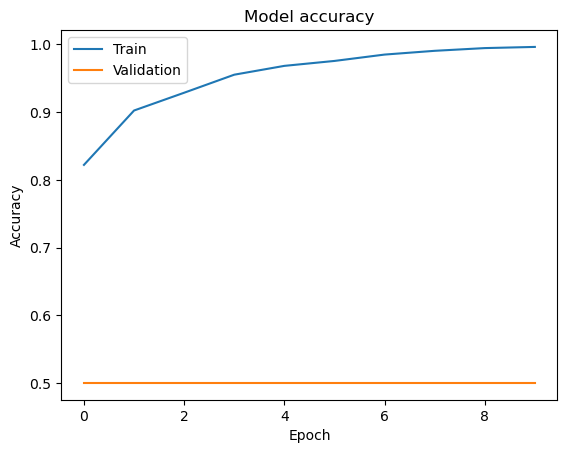

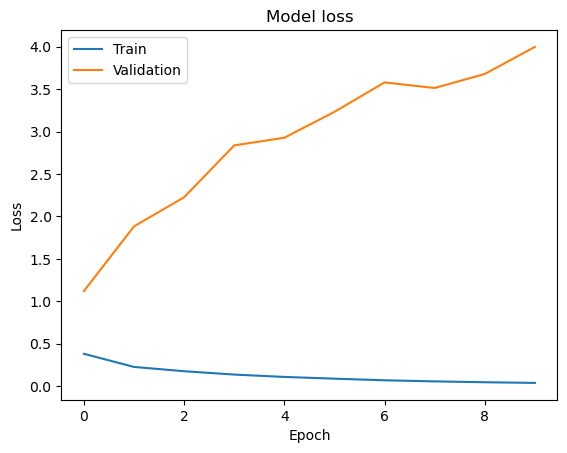

In [48]:
# data augmentation
# increases number of filters to add complexity, only increased the conv2d layers
# adding batch normalization
# adjusting learning rate

cnn_model5 = models.Sequential()
cnn_model5.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(100, 100, 3)))
cnn_model5.add(layers.BatchNormalization())
cnn_model5.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model5.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model5.add(layers.BatchNormalization())
cnn_model5.add(layers.MaxPooling2D((2, 2)))
cnn_model5.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model5.add(layers.BatchNormalization())


# Adding dense layers on top

cnn_model5.add(layers.Flatten())
cnn_model5.add(layers.Dense(16, activation='relu'))
cnn_model5.add(layers.Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
cnn_model5.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Inspecting model summary
cnn_model5.summary()

# Train the model and store the history
history5 = cnn_model5.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(val_images, val_labels))

# Evaluate the model 
train_loss, train_acc = cnn_model5.evaluate(train_images, train_labels)
print("Train Accuracy:", train_acc)
test_loss, test_acc = cnn_model5.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

# Plot the curves
plot_curves(history5)

## CNN Model 2

In [21]:
# cnn model 2
# adding batch normlaization 

cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(filters= 16, 
                        kernel_size=(3,3), 
                        activation='relu', 
                        input_shape=(100, 100, 3)))
cnn_model.add(BatchNormalization())
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(BatchNormalization())

# Adding dense layers on top

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(32, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

# Compiling model with following parameters
cnn_model.compile(optimizer='adam',
                loss='binary_crossentropy', 
                metrics=['accuracy'])

# Inspecting model summary
cnn_model.summary()

# Fit and train the model 
cnn_model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Evaluate the model 
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

train_loss, train_acc = cnn_model.evaluate(train_images, train_labels)
print("Train Accuracy:", train_acc)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 47, 47, 32)       128       
 hNormalization)                                                 
                                                      

## CNN Model 3

In [ ]:
# cnn model 3
# adding batch normlaization 

cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(filters= 8, 
                        kernel_size=(3,3), 
                        activation='relu', 
                        input_shape=(100, 100, 3)))
cnn_model.add(BatchNormalization())
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(layers.Conv2D(16, (3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(16, (3, 3), activation='relu'))
cnn_model.add(BatchNormalization())

# Adding dense layers on top

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(16, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

# Compiling model with following parameters
cnn_model.compile(optimizer='adam',
                loss='binary_crossentropy', 
                metrics=['accuracy'])

# Inspecting model summary
cnn_model.summary()

# Fit and train the model 
cnn_model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Evaluate the model 
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

train_loss, train_acc = cnn_model.evaluate(train_images, train_labels)
print("Train Accuracy:", train_acc)

## Baseline Model 

In [12]:
# Baseline model

model_1 = Sequential()
model_1.add(Dense(12, activation='relu', input_shape=(196608,)))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

# Compiling model with following parameters
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Inspecting model summary

model_1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                2359308   
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,359,421
Trainable params: 2,359,421
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the model to the training data
results_1 = model_1.fit(train_img, train_y, 
                        epochs=10, 
                        batch_size=32, 
                        validation_data=(val_img, val_y))

Epoch 1/10
163/163 [==============================] - 30s 169ms/step - loss: 0.6825 - accuracy: 0.7398 - val_loss: 0.7026 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 22s 136ms/step - loss: 0.6093 - accuracy: 0.7429 - val_loss: 0.7431 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 14s 86ms/step - loss: 0.5788 - accuracy: 0.7429 - val_loss: 0.7895 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 17s 102ms/step - loss: 0.5714 - accuracy: 0.7429 - val_loss: 0.8126 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 13s 79ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.8231 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 15s 94ms/step - loss: 0.5701 - accuracy: 0.7429 - val_loss: 0.8256 - val_accuracy: 0.5000
Epoch 7/10
163/163 [==============================] - 11s 66ms/step - loss: 0.5700 - accuracy: 0.7429 - val_loss: 0.8270 - val_accura

In [14]:
# Training Results 
results_train = model_1.evaluate(train_img, train_y)

# Test Results 

results_test = model_1.evaluate(test_img, test_y)

20/20 [==============================] - 3s 108ms/step - loss: 0.6930 - accuracy: 0.6250


In [15]:
print('Train Results:', results_train)
print('Test Results:', results_test)

Train Results: [0.5700258016586304, 0.7429064512252808]
Test Results: [0.6930213570594788, 0.625]


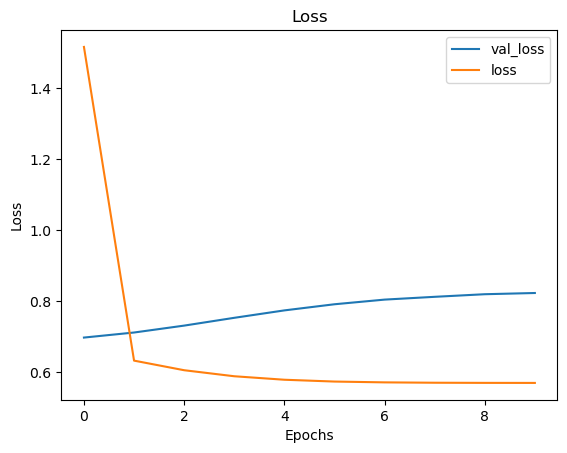

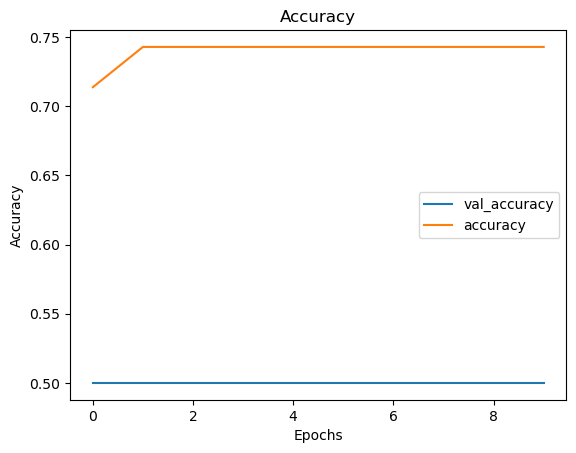

In [16]:
# Creating function to plot loss and accuracy curves

def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

# Viewing results 
visualize_training_results(results_1)

## Example Model 

In [ ]:
import matplotlib.pyplot as plt

# Define the model architecture and compile it
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(100, 100, 3)))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(16, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
cnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and monitor the training and validation curves
history = cnn_model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(val_images, val_labels))

# Plot training and validation curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)
